## **Shoe vs Sandal vs Boot Image Dataset**
- 신발의 종류 다중분류 (Shoe , Sandal , Boot)

https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/foot/original/'

idg = ImageDataGenerator(rescale=1./255)

generator = idg.flow_from_directory(root, target_size=(64, 64), batch_size=32, class_mode='categorical')
print(generator.class_indices)

Found 15000 images belonging to 3 classes.
{'Boot': 0, 'Sandal': 1, 'Shoe': 2}


In [2]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'Boot', 1: 'Sandal', 2: 'Shoe'}

In [3]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])

In [4]:
import pandas as pd

foot_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
foot_df.file_paths = foot_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
foot_df

file_paths target_names  targets
0         ./datasets/foot/original/Boot/boot (1).jpg         Boot        0
1        ./datasets/foot/original/Boot/boot (10).jpg         Boot        0
2       ./datasets/foot/original/Boot/boot (100).jpg         Boot        0
3      ./datasets/foot/original/Boot/boot (1000).jpg         Boot        0
4      ./datasets/foot/original/Boot/boot (1001).jpg         Boot        0
...                                              ...          ...      ...
14995   ./datasets/foot/original/Shoe/Shoe (995).jpg         Shoe        2
14996   ./datasets/foot/original/Shoe/Shoe (996).jpg         Shoe        2
14997   ./datasets/foot/original/Shoe/Shoe (997).jpg         Shoe        2
14998   ./datasets/foot/original/Shoe/Shoe (998).jpg         Shoe        2
14999   ./datasets/foot/original/Shoe/Shoe (999).jpg         Shoe        2

[15000 rows x 3 columns]

In [5]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_targets, test_targets = \
train_test_split(foot_df.file_paths, 
                 foot_df.targets, 
                 stratify=foot_df.targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(test_targets.value_counts())

targets
2    4000
0    4000
1    4000
Name: count, dtype: int64
targets
2    1000
1    1000
0    1000
Name: count, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, 
                 train_targets, 
                 stratify=train_targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(validation_targets.value_counts())
print(test_targets.value_counts())

targets
1    3200
0    3200
2    3200
Name: count, dtype: int64
targets
1    800
0    800
2    800
Name: count, dtype: int64
targets
2    1000
1    1000
0    1000
Name: count, dtype: int64


In [7]:
train_df = foot_df.iloc[train_images.index].reset_index(drop=True)
validation_df = foot_df.iloc[validation_images.index].reset_index(drop=True)
test_df = foot_df.iloc[test_images.index].reset_index(drop=True)

print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(9600, 3)
(2400, 3)
(3000, 3)


In [8]:
# import shutil
# import os.path

# base_dir = './datasets/foot/'


# for filepath in train_df.file_paths:
#     destination = base_dir + 'train/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
#     if not os.path.exists(destination):
#         os.makedirs(destination)
#     shutil.copy2(filepath, destination)

In [9]:
# import shutil
# import os.path

# base_dir = './datasets/foot/'


# for filepath in validation_df.file_paths:
#     destination = base_dir + 'validation/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
#     if not os.path.exists(destination):
#         os.makedirs(destination)
#     shutil.copy2(filepath, destination)

In [10]:
# import shutil
# import os.path

# base_dir = './datasets/foot/'


# for filepath in test_df.file_paths:
#     destination = base_dir + 'test/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]
    
#     if not os.path.exists(destination):
#         os.makedirs(destination)
#     shutil.copy2(filepath, destination)

In [1]:
from glob import glob
import os

# 경로 지정
train_dir = './datasets/foot/train/'
validation_dir = './datasets/foot/validation/'
test_dir = './datasets/foot/test/'

# 해당 경로를 통해 이미지 폴더를 찾아옴
directories = glob(os.path.join(train_dir, '*'))

In [2]:
# 폴더 이름 저장할 초기 list 생성
directory_names = []

for directory in directories:
    # 디렉토리의 이름을 찾아와서 list에 저장
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['Boot', 'Sandal', 'Shoe']


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 244

# 이미지 전처리 객체 선언
idg = ImageDataGenerator()

# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
train_generator = idg.flow_from_directory(train_dir,
                                          target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                          batch_size=BATCH_SIZE,
                                          class_mode='categorical',
                                          shuffle=True)

# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
validation_generator = idg.flow_from_directory(validation_dir,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')

# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
test_generator = idg.flow_from_directory(test_dir,
                                         target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                         batch_size=BATCH_SIZE,
                                         class_mode='categorical')

# 각 클랙스의 이름과 인덱스 출력
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 9600 images belonging to 3 classes.
Found 2400 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
{'Boot': 0, 'Sandal': 1, 'Shoe': 2}
{'Boot': 0, 'Sandal': 1, 'Shoe': 2}
{'Boot': 0, 'Sandal': 1, 'Shoe': 2}


In [4]:
# 각 타겟의 타겟 이름을 담기 위해 key와 value의 순서 변경하여 타겟의 고유값을 저장
target_name = {v: k for k, v in train_generator.class_indices.items()}
target_name

{0: 'Boot', 1: 'Sandal', 2: 'Shoe'}

In [5]:
# 각 타겟의 이름 담을 초기 list 선언
tarin_target_names = []
validation_target_names = []
test_target_names = []

# 각 타겟의 인덱스를 확인하여 인덱스에 맞는 타겟 이름을 담아주기
for target in train_generator.classes:
    tarin_target_names.append(target_name[target])

for target in validation_generator.classes:
    validation_target_names.append(target_name[target])

for target in test_generator.classes:
    test_target_names.append(target_name[target])

# 각 타겟의 개수 확인
print(tarin_target_names.__len__(), validation_target_names.__len__(), test_target_names.__len__())

9600 2400 3000


In [6]:
import pandas as pd

# 파일 경로와 타겟값을 가지고 새로운 데이터 프레임 생성 후
# 경로 중 \\(역슬래시)로 되어 있는 부분을 /(슬래시)로 변경
train_df = pd.DataFrame({'file_paths': train_generator.filepaths, 'target_names': tarin_target_names, 'targets': train_generator.classes})
train_df.file_paths = train_df.file_paths.apply(lambda x: x.replace('\\', '/'))

validation_df = pd.DataFrame({'file_paths': validation_generator.filepaths, 'target_names': validation_target_names, 'targets': validation_generator.classes})
validation_df.file_paths = validation_df.file_paths.apply(lambda x: x.replace('\\', '/'))

test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda x: x.replace('\\', '/'))

display(train_df)
display(validation_df)
display(test_df)

file_paths target_names  targets
0      ./datasets/foot/train/Boot/boot (100).jpg         Boot        0
1     ./datasets/foot/train/Boot/boot (1002).jpg         Boot        0
2     ./datasets/foot/train/Boot/boot (1003).jpg         Boot        0
3     ./datasets/foot/train/Boot/boot (1007).jpg         Boot        0
4     ./datasets/foot/train/Boot/boot (1008).jpg         Boot        0
...                                          ...          ...      ...
9595   ./datasets/foot/train/Shoe/Shoe (995).jpg         Shoe        2
9596   ./datasets/foot/train/Shoe/Shoe (996).jpg         Shoe        2
9597   ./datasets/foot/train/Shoe/Shoe (997).jpg         Shoe        2
9598   ./datasets/foot/train/Shoe/Shoe (998).jpg         Shoe        2
9599   ./datasets/foot/train/Shoe/Shoe (999).jpg         Shoe        2

[9600 rows x 3 columns]

file_paths target_names  targets
0       ./datasets/foot/validation/Boot/boot (10).jpg         Boot        0
1     ./datasets/foot/validation/Boot/boot (1001).jpg         Boot        0
2     ./datasets/foot/validation/Boot/boot (1006).jpg         Boot        0
3     ./datasets/foot/validation/Boot/boot (1039).jpg         Boot        0
4      ./datasets/foot/validation/Boot/boot (104).jpg         Boot        0
...                                               ...          ...      ...
2395   ./datasets/foot/validation/Shoe/Shoe (933).jpg         Shoe        2
2396   ./datasets/foot/validation/Shoe/Shoe (942).jpg         Shoe        2
2397   ./datasets/foot/validation/Shoe/Shoe (943).jpg         Shoe        2
2398   ./datasets/foot/validation/Shoe/Shoe (945).jpg         Shoe        2
2399   ./datasets/foot/validation/Shoe/Shoe (984).jpg         Shoe        2

[2400 rows x 3 columns]

file_paths target_names  targets
0        ./datasets/foot/test/Boot/boot (1).jpg         Boot        0
1     ./datasets/foot/test/Boot/boot (1000).jpg         Boot        0
2     ./datasets/foot/test/Boot/boot (1004).jpg         Boot        0
3     ./datasets/foot/test/Boot/boot (1005).jpg         Boot        0
4     ./datasets/foot/test/Boot/boot (1010).jpg         Boot        0
...                                         ...          ...      ...
2995   ./datasets/foot/test/Shoe/Shoe (985).jpg         Shoe        2
2996   ./datasets/foot/test/Shoe/Shoe (987).jpg         Shoe        2
2997   ./datasets/foot/test/Shoe/Shoe (988).jpg         Shoe        2
2998   ./datasets/foot/test/Shoe/Shoe (991).jpg         Shoe        2
2999   ./datasets/foot/test/Shoe/Shoe (994).jpg         Shoe        2

[3000 rows x 3 columns]

In [17]:
print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(9600, 3)
(2400, 3)
(3000, 3)


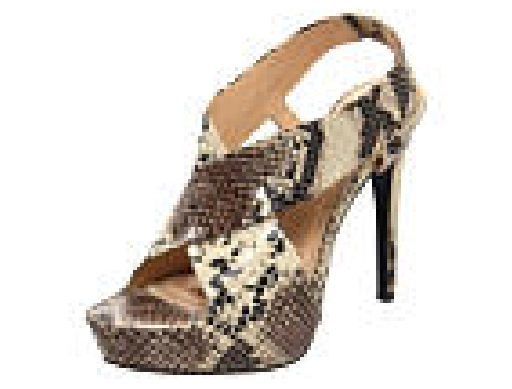

In [18]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[5000]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

## **사전훈련모델별 유사도 예측**

In [11]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 데이터 세트 생성 class 정의
class Dataset(Sequence):
    # 클래스의 초기화
    # 경로, 타겟, 배치 크기, albumentations 객체, 전처리 하마, 셔플 여부를 인자로 받음
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        # shuffle True 시 진행:
        if self.shuffle:
            # epoch 끝날 때마다 호출
            self.on_epoch_end()

    # 전체 데이터 세트 크기 반환
    def __len__(self):
        # 하나의 배치 사이즈에 필요한 데이터 개수 리턴
        return int(np.ceil(len(self.targets) / self.batch_size))

    # 주어진 인덱스에 해당하는 배치 반환
    def __getitem__(self, index):
        # 파일 경로와 타겟 데이터를 배치 크기만큼 자르고, 이미지를 불러와 처리한 후 배치로 반환
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # 데이터 배치 저장
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 데이터 수만큼 반복
        for i in range(file_paths_batch.shape[0]):
            # RGB로 색상 형식을 변환하여 이미지 가져오기
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 이미지 크기 조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # albumentations이 있다면:
            if self.aug is not None:
                # Augmentor 객체로 이미지 변환
                image = self.aug(image=image)['image']

            # 전처리 함수가 있다면:
            if self.preprocess is not None:
                # 이미지 전처리 진행
                image = self.preprocess(image)

            # 결과 배치에 이미지를 저장
            results_batch[i] = image

        # 결과 배치와 타겟 배치를 반환
        return results_batch, targets_batch
        
    def on_epoch_end(self):
        # shuffle 옵션이 켜져있다면, 데이터를 섞기
        if self.shuffle:
            # epoch 끝날 때마다 데이터 섞기
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)

In [12]:
def create_dataset(paths, targets, BATCH_SIZE, shuffle=True):   
    return Dataset(paths,
                   targets,
                   batch_size=BATCH_SIZE,
                   shuffle=True)

In [13]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

In [14]:
import matplotlib.pyplot as plt

def show_images(files_batch, ncols=4, title=None):    
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    
    for i in range(ncols):
        # files_batch는 float이므로 int로 변경
        axs[i].imshow(np.array(files_batch[i], dtype='int32'))
        axs[i].axis('off')
        axs[i].set_title(title[i]) 

In [15]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions as vgg16_decode_predictions
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions as resnet50v2_decode_predictions
from tensorflow.keras.applications.xception import Xception, decode_predictions as xception_decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions as mobilenetv2_decode_predictions

def predict_and_display(images, titles, model_name):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=len(images))

    # VGG16 모델 선택
    if model_name == 'vgg16':
        model = VGG16()
        decode_predictions = vgg16_decode_predictions
        target_size = (224, 224)
    # ResNet50V2 모델 선택
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2()
        decode_predictions = resnet50v2_decode_predictions
        target_size = (224, 224)
    # Xception 모델 선택
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception()
        decode_predictions = xception_decode_predictions
        target_size = (299, 299)
    # MobileNetV2 모델 선택
    elif model_name == 'mobilenet':
        model = MobileNetV2()
        decode_predictions = mobilenetv2_decode_predictions
        target_size = (224, 224)

    for i, image in enumerate(images):
        # 모델 입력 크기에 맞게 이미지 크기 조정
        resized_image = cv2.resize(image, target_size)
        # 이미지 배열로 변환
        image_array = img_to_array(resized_image)
        # 차원 확장 (배열의 첫 번째 차원 확장)
        image_array = np.expand_dims(image_array, axis=0)
        # 이미지 예측
        prediction = model.predict(image_array)
        # 이미지 분류 모델의 예측 결과를 해석
        target = decode_predictions(prediction)
        # 높은 확률로 예측 된 클래스 이름과 확률
        predicted_class = target[0][0][1]
        predicted_probability = np.round(target[0][0][2] * 100, 2)
        
        # 이미지와 예측 결과 표시
        axs[i].imshow(image.astype('int'))
        axs[i].axis('off')
        axs[i].set_title(f"{predicted_class}\n{predicted_probability}%")

        print(target)

In [24]:
import albumentations as A

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 244

# 각 클래스에서 하나씩 이미지를 샘플링하여 균등한 배치 구성
sampled_df = test_df.groupby('targets', group_keys=False).apply(lambda x: x.sample(1))

# 데이터 경로 및 타겟 담기 (get_dummies를 통해 원-핫 인코딩 진행)
sampled_file_paths = sampled_df['file_paths'].values
sampled_targets = pd.get_dummies(sampled_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 좌우 반전
    A.HorizontalFlip(p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)

C:\Users\user\AppData\Local\Temp\ipykernel_5712\1732152726.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = test_df.groupby('targets', group_keys=False).apply(lambda x: x.sample(1))


In [25]:
# datasets 객체에서 배치 이미지를 불러온 후 각 변수에 저장
# iter: 반복 가능한 객체를 이터레이터(값을 순차적으로 반환하는 객체)로 변환
# next: 이터레이터 객체에서 값을 하나씩 가져오고 가져올 값이 없다면 StopIteration 예외 발생 
files_batch, targets_batch = next(iter(dataset))
# 레이블 인코딩시, target 차원을 2차원으로 맞춰줘야 한다.
print(files_batch.shape, targets_batch.shape)

(3, 244, 244, 3) (3, 3)


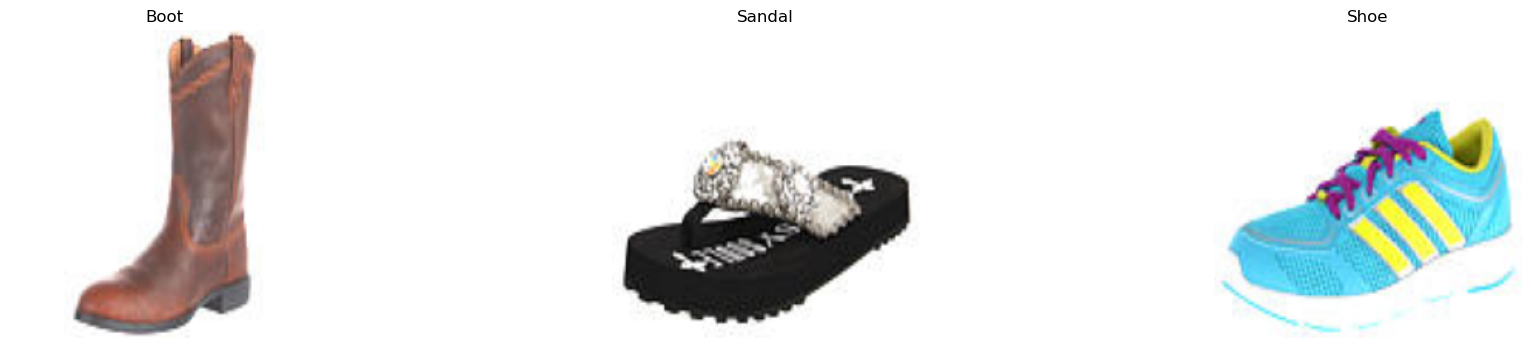

In [26]:
# 이미지 제목 생성
titles = [target_name[np.argmax(target)] for target in targets_batch]

# 정답 출력
show_images(files_batch, ncols=3, title=titles)

vgg16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
[[('n03124043', 'cowboy_boot', 0.7675572), ('n04254777', 'sock', 0.049967263), ('n03188531', 'diaper', 0.016197518), ('n04525038', 'velvet', 0.015345963), ('n03623198', 'knee_pad', 0.013426471)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
[[('n03476684', 'hair_slide', 0.38598618), ('n04133789', 'sandal', 0.07947041), ('n03000684', 'chain_saw', 0.04411227), ('n03314780', 'face_powder', 0.043740653), ('n03047690', 'clog', 0.040720914)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
[[('n04120489', 'running_shoe', 0.99069256), ('n03047690', 'clog', 0.0049610008), ('n04133789', 'sandal', 0.003894751), ('n03680355', 'Loafer', 0.0003234729), ('n04200800', 'shoe_shop', 0.0001040709)]]


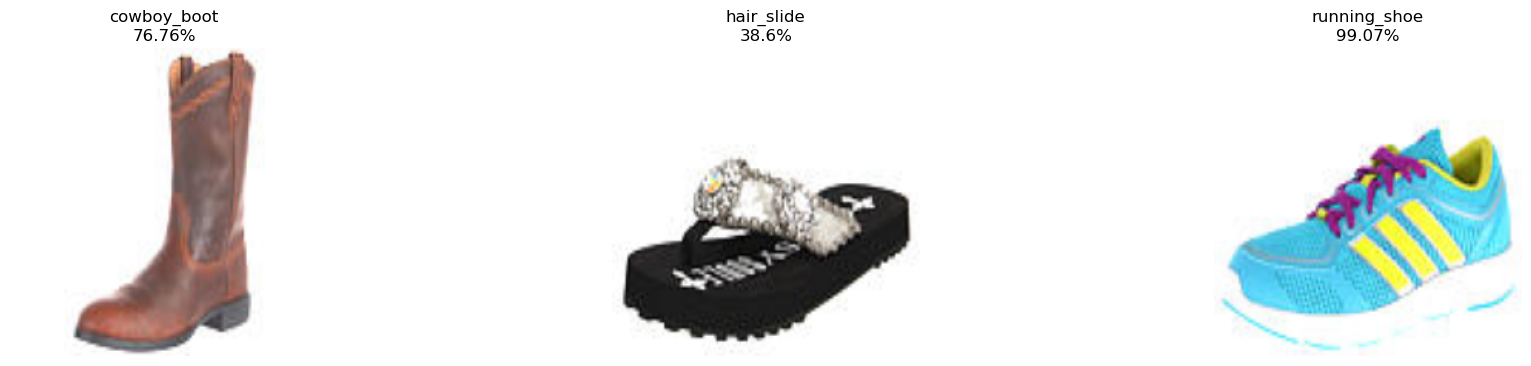

In [27]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

# 예측 모델 출력
print('vgg16')
predict_and_display(files_batch, titles, 'vgg16')

resnet50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n02089973', 'English_foxhound', 1.0), ('n02123597', 'Siamese_cat', 1.3023953e-32), ('n07613480', 'trifle', 1.3415884e-37), ('n15075141', 'toilet_tissue', 0.0), ('n02319095', 'sea_urchin', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[('n02089973', 'English_foxhound', 1.0), ('n02123597', 'Siamese_cat', 5.912635e-16), ('n01688243', 'frilled_lizard', 1.5496689e-16), ('n07613480', 'trifle', 1.3230771e-16), ('n01855032', 'red-breasted_merganser', 1.0724403e-34)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[('n02089973', 'English_foxhound', 1.0), ('n02123597', 'Siamese_cat', 4.8048215e-12), ('n01855032', 'red-breasted_merganser', 3.8171415e-35), ('n15075141', 'toilet_tissue', 0.0), ('n02397096', 'warthog', 0.0)]]


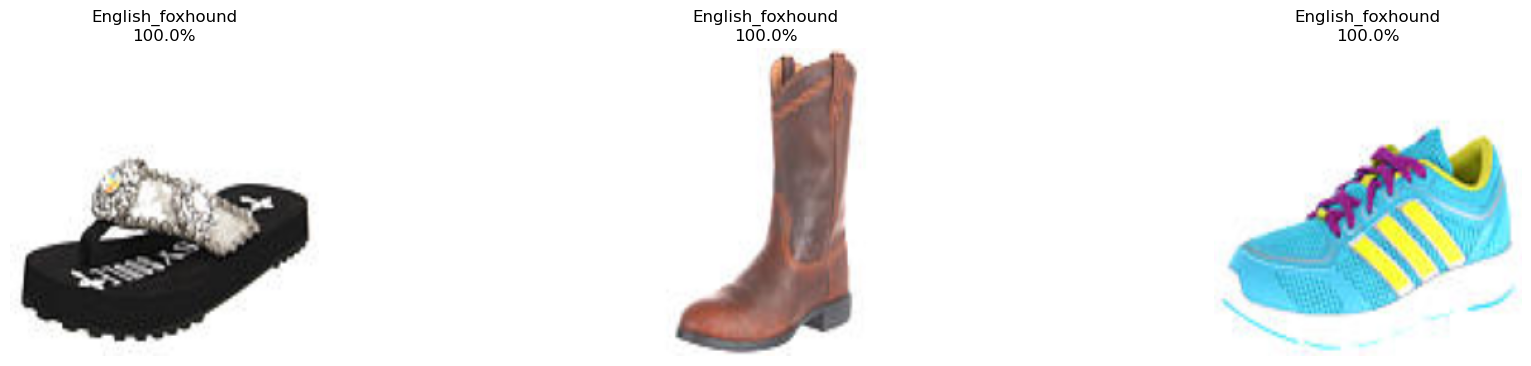

In [28]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('resnet50')
predict_and_display(files_batch, titles, 'resnet50')

xception
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step
[[('n03775546', 'mixing_bowl', 1.0), ('n04127249', 'safety_pin', 7.373102e-20), ('n15075141', 'toilet_tissue', 0.0), ('n02395406', 'hog', 0.0), ('n02389026', 'sorrel', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[[('n04127249', 'safety_pin', 1.0), ('n03775546', 'mixing_bowl', 4.6636513e-38), ('n15075141', 'toilet_tissue', 0.0), ('n02395406', 'hog', 0.0), ('n02389026', 'sorrel', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[[('n04127249', 'safety_pin', 1.0), ('n03775546', 'mixing_bowl', 7.9509797e-16), ('n15075141', 'toilet_tissue', 0.0), ('n02395406', 'hog', 0.0), ('n02389026', 'sorrel', 0.0)]]


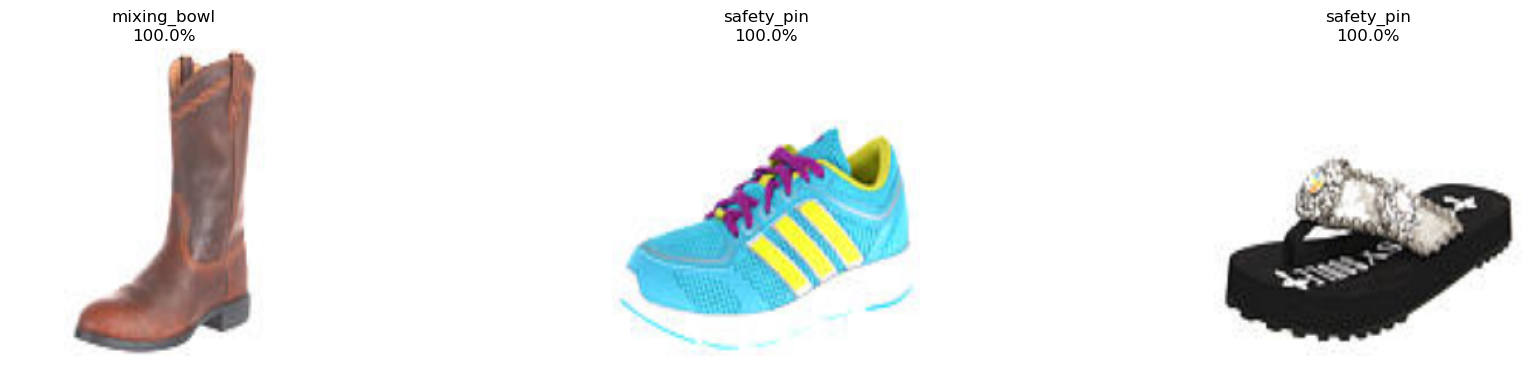

In [29]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('xception')
predict_and_display(files_batch, titles, 'xception')

mobilenet
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n04589890', 'window_screen', 0.19911982), ('n04254777', 'sock', 0.09682005), ('n04590129', 'window_shade', 0.08278974), ('n04286575', 'spotlight', 0.04877108), ('n03530642', 'honeycomb', 0.02391794)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[('n03938244', 'pillow', 0.14949751), ('n03291819', 'envelope', 0.1197229), ('n03627232', 'knot', 0.093038924), ('n04507155', 'umbrella', 0.06117574), ('n03485794', 'handkerchief', 0.019572651)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[('n03291819', 'envelope', 0.1920933), ('n03627232', 'knot', 0.10173103), ('n03938244', 'pillow', 0.071848035), ('n04591157', 'Windsor_tie', 0.04913915), ('n03720891', 'maraca', 0.021235593)]]


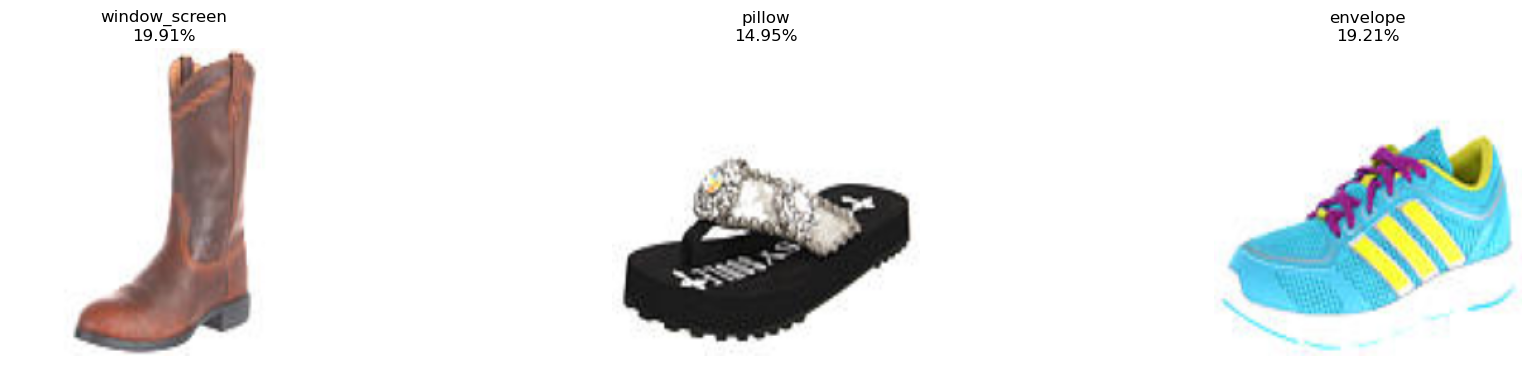

In [30]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('mobilenet')
predict_and_display(files_batch, titles, 'mobilenet')

## **1Cycle**

In [7]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 이미지와 배치사이즈 선언
IMAGE_SIZE = 64
BATCH_SIZE = 64

# Dataset class를 만들어서 Sequence를 상속받아서 만들어서 사용한다
class Dataset(Sequence):
    
    # 생성자
    # 훈련할 경로로, 타겟, 배치사이즈, aug, preprocess를 전달하는데 augmentation은 객체를 전달해야한다.
    # Dataset을 객체화 할 때 aug에 객체를 전달하면 cv2로 가져온 이미지를 넣어주면서 적용되는 원리이다.
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        # 전처리 함수 (preprocess)
        self.preprocess = preprocess
        self.shuffle = shuffle

        # 1 에포크당 데이터셋 객체가 자동으로 객체화 되며, 1 에포크당 1번의 새로운 데이터가 만들어진다.
        # 에포크 종료시, 객체 생성 및 데이터 섞기 (매 에포크당 새로운 객체를 쓸 수 있게 만들어준다)
        if self.shuffle:
            self.on_epoch_end()
            
    # len 재정의 함수 (하나의 배치사이즈에 필요한 개수를 리턴해주기 위해, 데이터의 길이를 리턴) 
    def __len__(self):
        # (반올림(전체 개수 / 전달받은 배치사이즈 개수)) 전체가 float 이기때문에 int로 형변환 
        return int(np.ceil(len(self.targets) / self.batch_size))

    # len 의 개수에 맞춰 getitem으로 해당하는 데이터를 가져오며 그걸 fit 하는 원리이다.
    # 해당 인덱스에 해당하는 batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        
        # index 번호에 맞는 데이터들을 가져온다.
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # file_path_batch 행의 개수(데이터 수)만큼 4차원으로 nd array를 만들어야한다. (배치사이즈, 길이, 높이, 깊이)
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 이미지 전처리(aug)는 1장씩 하기때머문에, 반복문을 통해 하나씩 실행하고 그걸 전부 리스트에 담아서 리턴한다.
        for i in range(file_paths_batch.shape[0]):
            
            # 파일 경로에서 이미지를 읽어온 후 BGR에서 RGB로 변환
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 원본 이미지를 선언해놓은 이미지 사이즈로 재조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # augmentation이 있다면 그걸 이미지에 적용
            if self.aug is not None:
                image = self.aug(image=image)['image']

            # preprocess가 전달됐다면 이미지 전처리 적용
            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            # 변환이 다 끝난 이미지 저장
            results_batch[i] = image

        # 처리된 이미지 결과와 타겟을 리턴
        return results_batch, targets_batch

    # 1 epoch가 끝날 때마다 shuffle로 데이터를 섞어주는 함수
    def on_epoch_end(self):
        
        # shuffle 메소드를 사용하여 한 쌍씩(이미지, 타겟) 섞기
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [32]:
import albumentations as A
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy


# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(3, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [34]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='vgg16', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          25,6

 Total params: 14,740,491 (56.23 MB)

 Trainable params: 14,740,491 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 함수 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [36]:
import gc

# 메모리 해제 함수
gc.collect()

6742

In [37]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - acc: 0.3725 - loss: 8.1201 - val_acc: 0.6683 - val_loss: 0.6911 - learning_rate: 0.0010
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - acc: 0.7487 - loss: 0.5518 - val_acc: 0.8342 - val_loss: 0.4203 - learning_rate: 0.0010
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - acc: 0.8706 - loss: 0.3332 - val_acc: 0.8946 - val_loss: 0.2592 - learning_rate: 0.0010
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - acc: 0.9323 - loss: 0.1873 - val_acc: 0.9367 - val_loss: 0.1726 - learning_rate: 0.0010
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - acc: 0.9567 - loss: 0.1313 - val_acc: 0.9246 - val_loss: 0.1863 - learning_rate: 0.0010
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - acc: 0.9637 - loss: 0.1106 - val_acc: 0.9592 - val_loss: 0.1232 - learning_rate: 0.0010
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - acc: 0.9682 - loss: 0.0837 - val_acc: 0.9362 - val_loss: 0.1823 - learning_rate: 0.0010
Epoch 8/10

In [38]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 605ms/step - acc: 0.9823 - loss: 0.0449


[0.06470594555139542, 0.9779999852180481]

#### train acc: 0.9932 , val acc: 0.9746, test acc: 0.9779

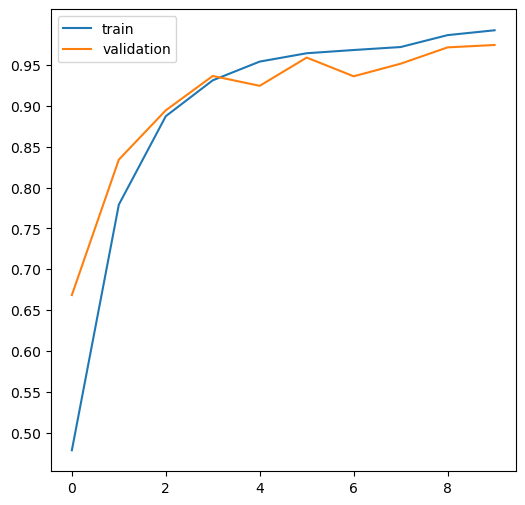

In [39]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

In [40]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


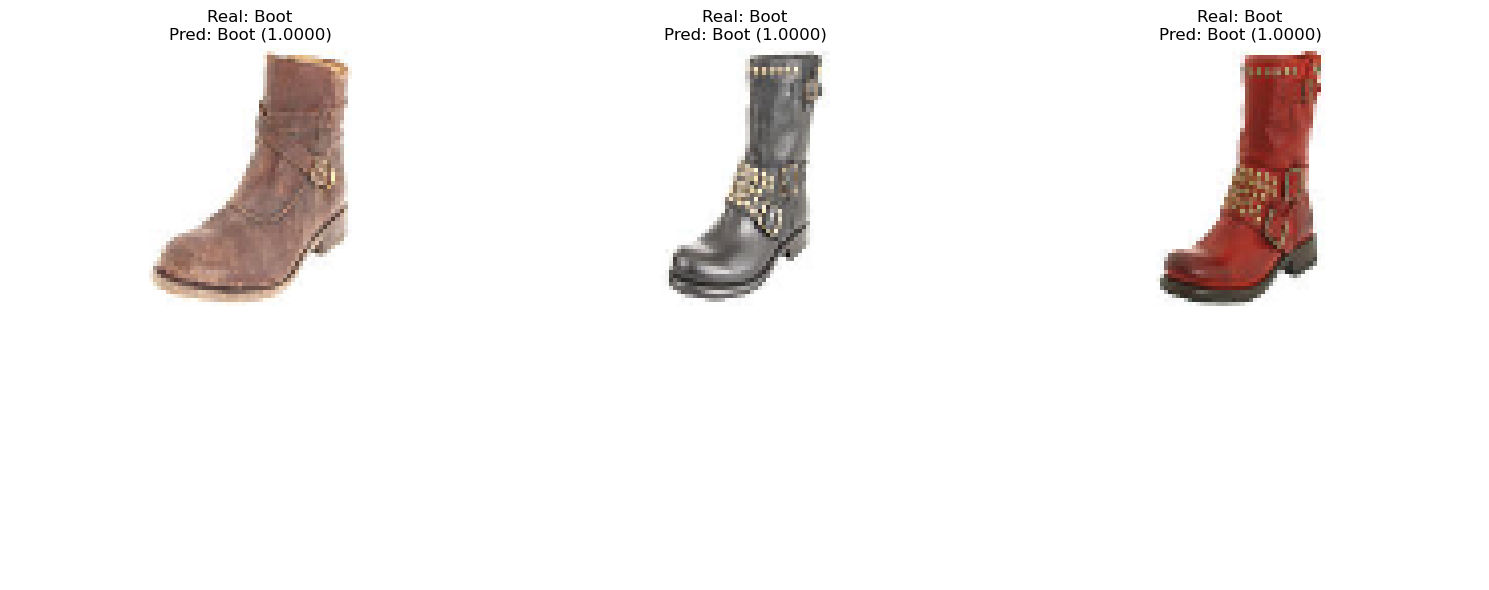

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# 클래스 이름 지정
class_names = ['Boot', 'Sandal', 'Shoe']

# 선택할 이미지의 시작 인덱스와 끝 인덱스 지정
start_index = 100
end_index = 103

# 행과 열의 개수 지정
num_rows = (end_index - start_index + 3) // 3  # +3 ensures rounding up
num_cols = 3

# 서브플롯 설정
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# 시작부터 끝 인덱스까지의 이미지들을 처리
for idx, i in enumerate(range(start_index, end_index)):
    # 이미지 파일 경로 선택
    selected_file_path = train_file_paths[i]

    # 이미지 로드 및 전처리
    image = cv2.cvtColor(cv2.imread(selected_file_path), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (64, 64))
    processed_image = vgg16_preprocess_input(image.copy())

    # 모델 예측
    predicted_probabilities = model.predict(np.expand_dims(processed_image, axis=0))

    # 예측된 클래스 및 확률 출력
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = predicted_probabilities[0][predicted_class_index]

    # 실제 클래스 정보 가져오기
    real_class_index = np.where(train_targets[i])[0][0]  # True 값의 인덱스 가져오기
    real_class_name = class_names[real_class_index]

    # 서브플롯에 이미지와 텍스트 출력
    ax = axs[idx // num_cols, idx % num_cols]
    ax.imshow(image)
    ax.set_title(f"Real: {real_class_name}\nPred: {predicted_class_name} ({predicted_probability:.4f})")
    ax.axis('off')

# 남은 서브플롯을 비활성화
for j in range(idx + 1, num_rows * num_cols):
    axs[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


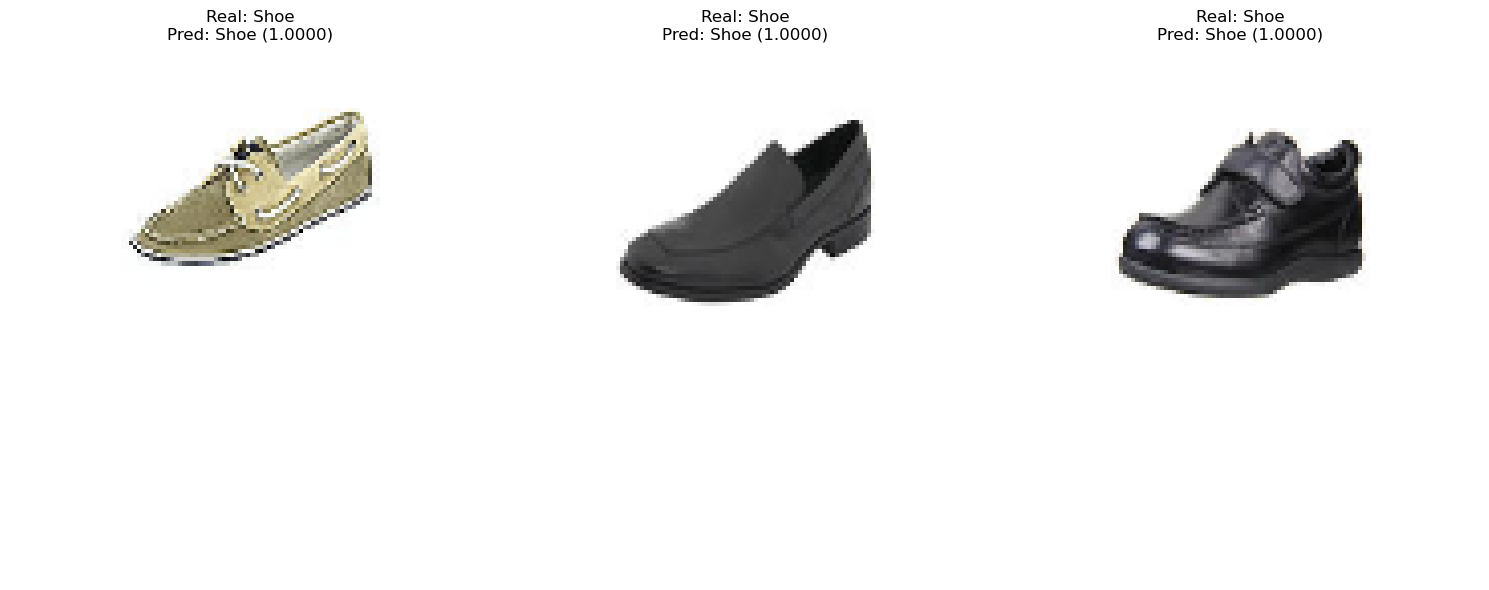

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# 클래스 이름 지정
class_names = ['Boot', 'Sandal', 'Shoe']

# 선택할 이미지의 시작 인덱스와 끝 인덱스 지정
start_index = 6405
end_index = 6408

# 행과 열의 개수 지정
num_rows = (end_index - start_index + 3) // 3  # +3 ensures rounding up
num_cols = 3

# 서브플롯 설정
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# 시작부터 끝 인덱스까지의 이미지들을 처리
for idx, i in enumerate(range(start_index, end_index)):
    # 이미지 파일 경로 선택
    selected_file_path = train_file_paths[i]

    # 이미지 로드 및 전처리
    image = cv2.cvtColor(cv2.imread(selected_file_path), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (64, 64))
    processed_image = vgg16_preprocess_input(image.copy())

    # 모델 예측
    predicted_probabilities = model.predict(np.expand_dims(processed_image, axis=0))

    # 예측된 클래스 및 확률 출력
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = predicted_probabilities[0][predicted_class_index]

    # 실제 클래스 정보 가져오기
    real_class_index = np.where(train_targets[i])[0][0]  # True 값의 인덱스 가져오기
    real_class_name = class_names[real_class_index]

    # 서브플롯에 이미지와 텍스트 출력
    ax = axs[idx // num_cols, idx % num_cols]
    ax.imshow(image)
    ax.set_title(f"Real: {real_class_name}\nPred: {predicted_class_name} ({predicted_probability:.4f})")
    ax.axis('off')

# 남은 서브플롯을 비활성화
for j in range(idx + 1, num_rows * num_cols):
    axs[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


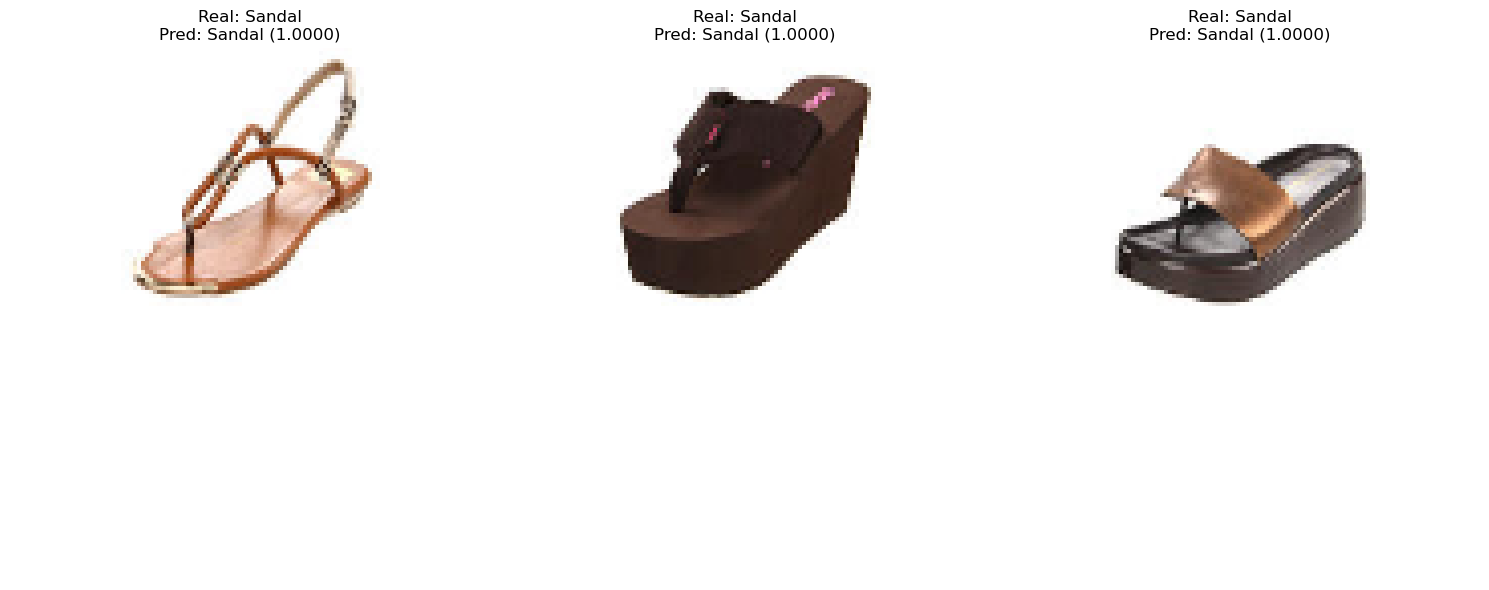

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# 클래스 이름 지정
class_names = ['Boot', 'Sandal', 'Shoe']

# 선택할 이미지의 시작 인덱스와 끝 인덱스 지정
start_index = 5205
end_index = 5208

# 행과 열의 개수 지정
num_rows = (end_index - start_index + 3) // 3  # +3 ensures rounding up
num_cols = 3

# 서브플롯 설정
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# 시작부터 끝 인덱스까지의 이미지들을 처리
for idx, i in enumerate(range(start_index, end_index)):
    # 이미지 파일 경로 선택
    selected_file_path = train_file_paths[i]

    # 이미지 로드 및 전처리
    image = cv2.cvtColor(cv2.imread(selected_file_path), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (64, 64))
    processed_image = vgg16_preprocess_input(image.copy())

    # 모델 예측
    predicted_probabilities = model.predict(np.expand_dims(processed_image, axis=0))

    # 예측된 클래스 및 확률 출력
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = predicted_probabilities[0][predicted_class_index]

    # 실제 클래스 정보 가져오기
    real_class_index = np.where(train_targets[i])[0][0]  # True 값의 인덱스 가져오기
    real_class_name = class_names[real_class_index]

    # 서브플롯에 이미지와 텍스트 출력
    ax = axs[idx // num_cols, idx % num_cols]
    ax.imshow(image)
    ax.set_title(f"Real: {real_class_name}\nPred: {predicted_class_name} ({predicted_probability:.4f})")
    ax.axis('off')

# 남은 서브플롯을 비활성화
for j in range(idx + 1, num_rows * num_cols):
    axs[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


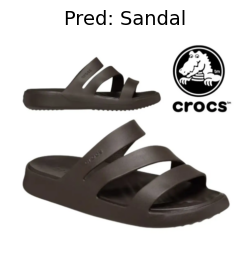

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 클래스 이름 정의
CLASS_NAMES = ['Boot', 'Sandal', 'Shoe']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/foot_sandal3.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


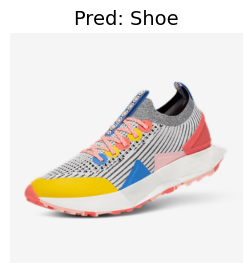

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 클래스 이름 정의
CLASS_NAMES = ['Boot', 'Sandal', 'Shoe']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/foot_shoe.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


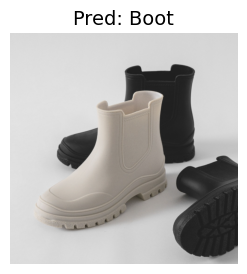

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 클래스 이름 정의
CLASS_NAMES = ['Sandal', 'Boot', 'Shoe']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/foot_rain_boot.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

## **2Cycle**

In [14]:
# freeze 확인하기
for i, layer in enumerate(model.layers[:-5]):
    layer.trainable = False
    print(i + 1, '.', layer.name, 'trainable:', layer.trainable)

print('\n######### classifier layers ######### ')
for layer in model.layers[-5:]:
    print(layer.name, 'trainable:', layer.trainable)

1 . input_layer trainable: False
2 . block1_conv1 trainable: False
3 . block1_conv2 trainable: False
4 . block1_pool trainable: False
5 . block2_conv1 trainable: False
6 . block2_conv2 trainable: False
7 . block2_pool trainable: False
8 . block3_conv1 trainable: False
9 . block3_conv2 trainable: False
10 . block3_conv3 trainable: False
11 . block3_pool trainable: False
12 . block4_conv1 trainable: False
13 . block4_conv2 trainable: False
14 . block4_conv3 trainable: False
15 . block4_pool trainable: False
16 . block5_conv1 trainable: False
17 . block5_conv2 trainable: False

######### classifier layers ######### 
block5_conv3 trainable: True
block5_pool trainable: True
global_average_pooling2d trainable: True
dense trainable: True
output trainable: True


In [15]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras import layers

IMAGE_SIZE = 64
BATCH_SIZE = 64

def fine_tune(datas, model_name, preprocess):
    FIRST_EPOCHS = 10
    SECOND_EPOCHS = 10
    
    train_file_paths, train_targets, \
    validation_file_paths, validation_targets, \
    test_file_paths, test_targets = datas

    train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=preprocess, 
                        shuffle=True)

    validation_dataset = Dataset(validation_file_paths, 
                            validation_targets, 
                            batch_size=BATCH_SIZE, 
                            preprocess=preprocess)
    
    model = create_model(model_name=model_name, verbose=True)
    model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

    # feature extractor layer들을 전부 freeze
    for layer in model.layers[:-5]:
        layer.trainable = False

    model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=FIRST_EPOCHS, 
              validation_data=validation_dataset)

    # 배치 정규화만 freeze 진행
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    # 부분 freeze 진행
    for layer in model.layers[:12]:
        layer.trainable = False
    
    model.compile(optimizer=Adam(0.00001), loss=CategoricalCrossentropy(), metrics=['acc'])
    history = model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=SECOND_EPOCHS, 
              validation_data=validation_dataset)
    
    return model, history

In [24]:
import gc

# 메모리 해제 함수
gc.collect()

9089

In [77]:
import albumentations as A
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

model, history = fine_tune((train_file_paths, train_targets,
           validation_file_paths, validation_targets,
           test_file_paths, test_targets),
          'vgg16', 
          vgg16_preprocess_input)

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │          25,6

 Total params: 14,740,491 (56.23 MB)

 Trainable params: 14,740,491 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 68s 447ms/step - acc: 0.8357 - loss: 2.4888 - val_acc: 0.9621 - val_loss: 0.1234
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 67s 446ms/step - acc: 0.9803 - loss: 0.0660 - val_acc: 0.9729 - val_loss: 0.1113
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 67s 447ms/step - acc: 0.9856 - loss: 0.0451 - val_acc: 0.9717 - val_loss: 0.1020
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 68s 450ms/step - acc: 0.9905 - loss: 0.0292 - val_acc: 0.9621 - val_loss: 0.1560
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 69s 462ms/step - acc: 0.9918 - loss: 0.0243 - val_acc: 0.9558 - val_loss: 0.2050
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 69s 461ms/step - acc: 0.9818 - loss: 0.0539 - val_acc: 0.9700 - val_loss: 0.1352
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 70s 463ms/step - acc: 0.9939 - loss: 0.0188 - val_acc: 0.9733 - val_loss: 0.1155
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 69s 462ms/step - acc: 0.9936 - loss: 0.0171 - val_acc: 0.9717 - val_loss: 0.1152
Epoch 9/10
150/150 ━━━━━━━━━━━━━

In [78]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 340ms/step - acc: 0.9837 - loss: 0.0607


[0.06289558112621307, 0.984333336353302]

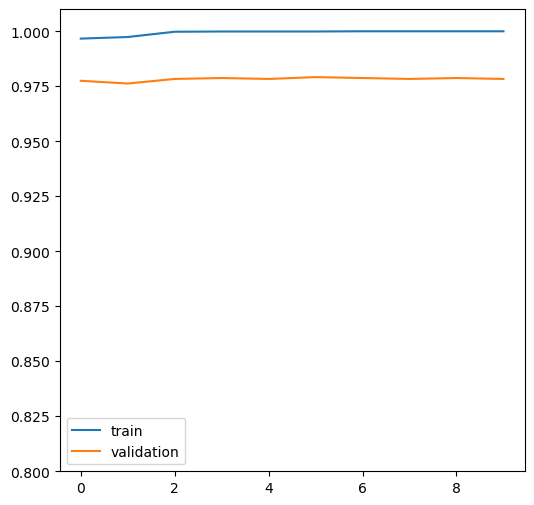

In [88]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    # plt.yticks(np.arange(0, 1, 0.05))
    plt.ylim(0.8, 1.01) 
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


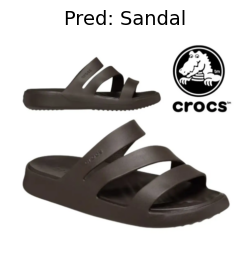

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 클래스 이름 정의
CLASS_NAMES = ['Boot', 'Sandal', 'Shoe']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/foot_sandal3.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


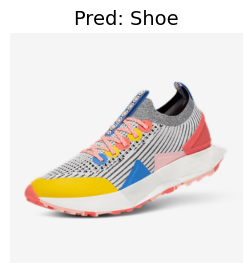

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 클래스 이름 정의
CLASS_NAMES = ['Boot', 'Sandal', 'Shoe']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/foot_shoe.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


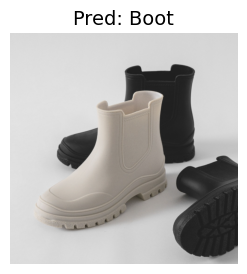

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 클래스 이름 정의
CLASS_NAMES = ['Sandal', 'Boot', 'Shoe']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/foot_rain_boot.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


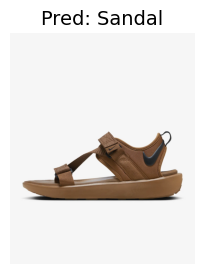

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 클래스 이름 정의
CLASS_NAMES = ['Boot','Sandal', 'Shoe']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/foot_sandal.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

## **3Cycle**

In [73]:
# freeze 확인하기
for i, layer in enumerate(model.layers[:-5]):
    layer.trainable = False
    print(i + 1, '.', layer.name, 'trainable:', layer.trainable)

print('\n######### classifier layers ######### ')
for layer in model.layers[-5:]:
    print(layer.name, 'trainable:', layer.trainable)

1 . input_layer_9 trainable: False
2 . block1_conv1 trainable: False
3 . block1_conv2 trainable: False
4 . block1_pool trainable: False
5 . block2_conv1 trainable: False
6 . block2_conv2 trainable: False
7 . block2_pool trainable: False
8 . block3_conv1 trainable: False
9 . block3_conv2 trainable: False
10 . block3_conv3 trainable: False
11 . block3_pool trainable: False
12 . block4_conv1 trainable: False
13 . block4_conv2 trainable: False
14 . block4_conv3 trainable: False
15 . block4_pool trainable: False
16 . block5_conv1 trainable: False
17 . block5_conv2 trainable: False

######### classifier layers ######### 
block5_conv3 trainable: True
block5_pool trainable: True
global_average_pooling2d_6 trainable: True
dense_5 trainable: True
output trainable: True


In [71]:
import albumentations as A
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy


# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

In [72]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='vgg16', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │          25,6

 Total params: 14,740,491 (56.23 MB)

 Trainable params: 14,740,491 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras import layers

IMAGE_SIZE = 64
BATCH_SIZE = 64

def fine_tune(datas, model_name, preprocess):
    FIRST_EPOCHS = 10
    SECOND_EPOCHS = 10
    
    train_file_paths, train_targets, \
    validation_file_paths, validation_targets, \
    test_file_paths, test_targets = datas

    train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=preprocess, 
                        shuffle=True)

    validation_dataset = Dataset(validation_file_paths, 
                            validation_targets, 
                            batch_size=BATCH_SIZE, 
                            preprocess=preprocess)
    
    model = create_model(model_name=model_name, verbose=True)
    model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

    # feature extractor layer들을 전부 freeze
    for layer in model.layers[:-5]:
        layer.trainable = False

    model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=FIRST_EPOCHS, 
              validation_data=validation_dataset)

    # 배치 정규화만 freeze 진행
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    # 부분 freeze 진행
    for layer in model.layers[:16]:
        layer.trainable = False
    
    model.compile(optimizer=Adam(0.00001), loss=CategoricalCrossentropy(), metrics=['acc'])
    history = model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=SECOND_EPOCHS, 
              validation_data=validation_dataset)
    
    return model, history

In [58]:
import gc

# 메모리 해제 함수
gc.collect()

7141

In [59]:
import albumentations as A
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

model, history = fine_tune((train_file_paths, train_targets,
           validation_file_paths, validation_targets,
           test_file_paths, test_targets),
          'vgg16', 
          vgg16_preprocess_input)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │          25,6

 Total params: 14,740,491 (56.23 MB)

 Trainable params: 14,740,491 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 69s 452ms/step - acc: 0.8447 - loss: 2.6809 - val_acc: 0.9467 - val_loss: 0.3268
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 73s 486ms/step - acc: 0.9591 - loss: 0.2685 - val_acc: 0.9463 - val_loss: 0.3830
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 71s 473ms/step - acc: 0.9712 - loss: 0.1725 - val_acc: 0.9646 - val_loss: 0.2735
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 73s 483ms/step - acc: 0.9878 - loss: 0.0487 - val_acc: 0.9567 - val_loss: 0.2951
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 73s 485ms/step - acc: 0.9874 - loss: 0.0477 - val_acc: 0.9679 - val_loss: 0.2182
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 73s 485ms/step - acc: 0.9914 - loss: 0.0258 - val_acc: 0.9658 - val_loss: 0.1959
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 71s 471ms/step - acc: 0.9937 - loss: 0.0223 - val_acc: 0.9671 - val_loss: 0.2166
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 70s 465ms/step - acc: 0.9891 - loss: 0.0356 - val_acc: 0.9712 - val_loss: 0.2009
Epoch 9/10
150/150 ━━━━━━━━━━━━━

In [60]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 306ms/step - acc: 0.9809 - loss: 0.1152


[0.10887053608894348, 0.9819999933242798]

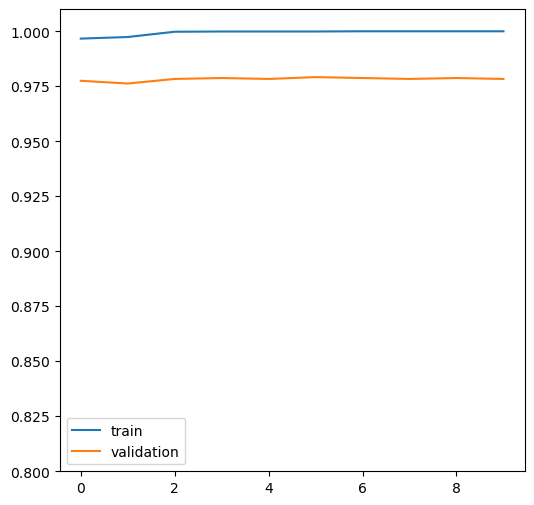

In [89]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    # plt.yticks(np.arange(0, 1, 0.05))
    plt.ylim(0.8, 1.01) 
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


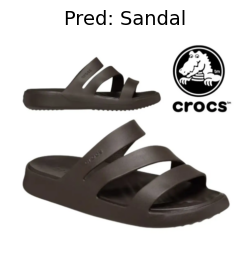

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 클래스 이름 정의
CLASS_NAMES = ['Boot', 'Sandal', 'Shoe']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/foot_sandal3.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


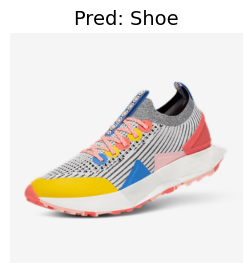

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 클래스 이름 정의
CLASS_NAMES = ['Boot', 'Sandal', 'Shoe']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/foot_shoe.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


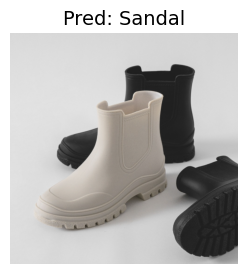

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 클래스 이름 정의
CLASS_NAMES = ['Boot', 'Sandal', 'Shoe']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/foot_rain_boot.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

## **결론**

#### **미세조정을 하지 않은 vgg16 모델**
> **1epoch : 200s - 220s**

<img src='./images/foot_freeze_no.png'>

---

<img src='./images/foot_freeze.png' width='500px'> <img src='./images/foot_freeze_layer.png' width='300px'>

---

#### **Freeze를 사용해 마지막층만 훈련시킨 vgg16 모델**
> **12. 1epoch : 60s - 110s**

<img src='./images/foot_freeze_1.png'>

---

#### **Freeze를 사용해 마지막층만 훈련시킨 vgg16 모델**
> **16. 1epoch : 60s - 75s**

<img src='./images/foot_freeze_2.png'>

## **MobileNet**

## **1Cycle**

In [28]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy


# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

In [29]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='mobilenet', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_6700\433207055.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 32, 32, 32)        │             864 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 32, 32, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 32, 32, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 32, 32, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 32, 32, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 32, 32, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 32, 32, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 32, 32, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 32, 32, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 32, 32, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 32, 32, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 33, 33, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 16, 16, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,187 (8.86 MB)

 Trainable params: 2,288,075 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [30]:
import gc

# 메모리 해제 함수
gc.collect()

41165

In [31]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 82s 394ms/step - acc: 0.7738 - loss: 0.6316 - val_acc: 0.8587 - val_loss: 1.1140 - learning_rate: 0.0010
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 58s 384ms/step - acc: 0.9476 - loss: 0.1734 - val_acc: 0.8512 - val_loss: 3.3237 - learning_rate: 0.0010
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 59s 390ms/step - acc: 0.9739 - loss: 0.0914 - val_acc: 0.9567 - val_loss: 0.8150 - learning_rate: 0.0010
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 58s 386ms/step - acc: 0.9852 - loss: 0.0489 - val_acc: 0.9758 - val_loss: 0.5037 - learning_rate: 0.0010


In [32]:
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - acc: 0.9678 - loss: 0.4807


[0.40198540687561035, 0.9729999899864197]

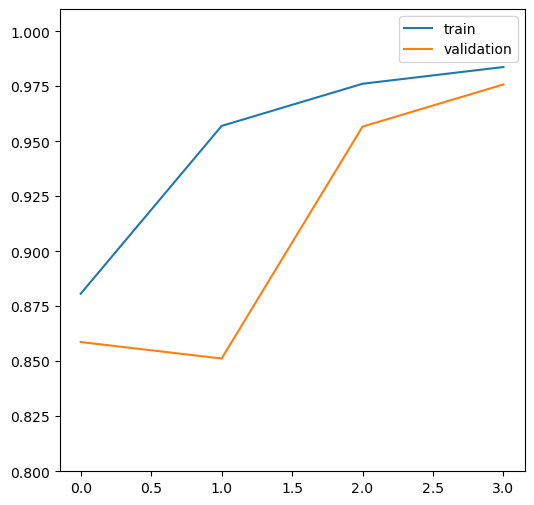

In [33]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    # plt.yticks(np.arange(0, 1, 0.05))
    plt.ylim(0.8, 1.01) 
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Sandal


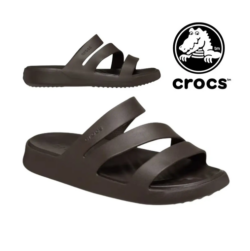

In [34]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

import cv2
import matplotlib.pyplot as plt

# 이미지 가져오기
image_path = './datasets/foot_sandal3.png'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

show_image(image)

import numpy as np

# 다중분류
resized_image = cv2.resize(image, (64, 64))
# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 지정
class_names = ['Boot', 'Sandal', 'Shoe']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=BATCH_SIZE)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Sandal


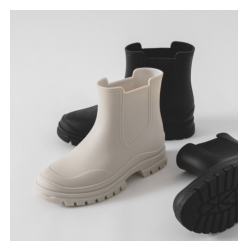

In [35]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

import cv2
import matplotlib.pyplot as plt

# 이미지 가져오기
image_path = './datasets/foot_rain_boot.png'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

show_image(image)

import numpy as np

# 다중분류
resized_image = cv2.resize(image, (64, 64))
# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 지정
class_names = ['Boot', 'Sandal', 'Shoe']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=BATCH_SIZE)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)

## **2Cycle**

In [36]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy


# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(3, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [40]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='mobilenet', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_6700\3869275182.py:20: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 32, 32, 32)        │             864 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 32, 32, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 32, 32, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 32, 32, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 32, 32, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 32, 32, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 32, 32, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 32, 32, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 32, 32, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 32, 32, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 32, 32, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 33, 33, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 16, 16, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,187 (8.86 MB)

 Trainable params: 2,288,075 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [41]:
import gc

# 메모리 해제 함수
gc.collect()

38582

In [42]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 84s 407ms/step - acc: 0.7728 - loss: 0.6754 - val_acc: 0.6917 - val_loss: 4.5689 - learning_rate: 0.0010
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 63s 418ms/step - acc: 0.9595 - loss: 0.1432 - val_acc: 0.8354 - val_loss: 1.6250 - learning_rate: 0.0010
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 59s 393ms/step - acc: 0.9730 - loss: 0.0922 - val_acc: 0.9325 - val_loss: 1.6657 - learning_rate: 0.0010
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 59s 392ms/step - acc: 0.9833 - loss: 0.0591 - val_acc: 0.8625 - val_loss: 4.0863 - learning_rate: 0.0010


In [43]:
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - acc: 0.9236 - loss: 2.2790


[3.905601978302002, 0.8709999918937683]

In [ ]:
# 얼리스타핑이랑 리듀스르,ㄹ 좀 더 높여서 멈추지 않고 학습하기

In [49]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy


# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 함수 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=4,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(3, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [52]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='mobilenet', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_6700\3869275182.py:20: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 32, 32, 32)        │             864 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 32, 32, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 32, 32, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 32, 32, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 32, 32, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 32, 32, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 32, 32, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 32, 32, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 32, 32, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 32, 32, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 32, 32, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 33, 33, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 16, 16, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,187 (8.86 MB)

 Trainable params: 2,288,075 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [53]:
import gc

# 메모리 해제 함수
gc.collect()

15191

In [54]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 84s 406ms/step - acc: 0.7559 - loss: 0.7312 - val_acc: 0.8612 - val_loss: 2.4476 - learning_rate: 0.0010
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 60s 402ms/step - acc: 0.9607 - loss: 0.1266 - val_acc: 0.9658 - val_loss: 0.7349 - learning_rate: 0.0010
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 59s 392ms/step - acc: 0.9756 - loss: 0.0869 - val_acc: 0.9525 - val_loss: 1.0095 - learning_rate: 0.0010
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 59s 391ms/step - acc: 0.9821 - loss: 0.0633 - val_acc: 0.8279 - val_loss: 3.5236 - learning_rate: 0.0010
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 59s 392ms/step - acc: 0.9901 - loss: 0.0365 - val_acc: 0.9746 - val_loss: 0.6318 - learning_rate: 0.0010
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 59s 393ms/step - acc: 0.9859 - loss: 0.0415 - val_acc: 0.9708 - val_loss: 0.5583 - learning_rate: 0.0010
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 59s 393ms/step - acc: 0.9929 - loss: 0.0238 - val_acc: 0.9650 - val_loss: 0.6877 - learnin

In [55]:
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 398ms/step - acc: 0.9672 - loss: 0.6193


[0.6191131472587585, 0.968999981880188]

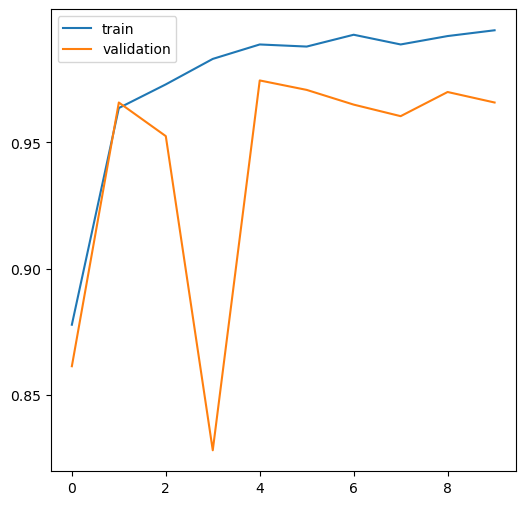

In [65]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    # plt.ylim(0.8, 1.01) 
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Shoe


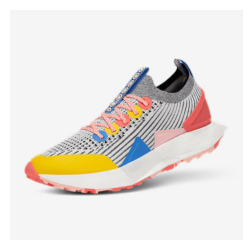

In [61]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

import cv2
import matplotlib.pyplot as plt

# 이미지 가져오기
image_path = './datasets/foot_shoe.png'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

show_image(image)

import numpy as np

# 다중분류
resized_image = cv2.resize(image, (64, 64))
# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 지정
class_names = ['Boot', 'Sandal', 'Shoe']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=BATCH_SIZE)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Shoe


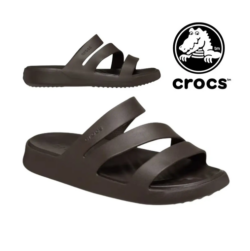

In [63]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

import cv2
import matplotlib.pyplot as plt

# 이미지 가져오기
image_path = './datasets/foot_sandal3.png'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

show_image(image)

import numpy as np

# 다중분류
resized_image = cv2.resize(image, (64, 64))
# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 지정
class_names = ['Boot', 'Sandal', 'Shoe']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=BATCH_SIZE)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)

In [ ]:
# 러닝레이트를 조금씩 줄여보자 0.00001 이 제일 적

In [67]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy


# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

In [68]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 함수 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=4,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [69]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', kernel_regularizer=l2(1e-5), kernel_initializer='he_normal')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(3, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [72]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='mobilenet', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(0.00001), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_6700\3869275182.py:20: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 32, 32, 32)        │             864 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 32, 32, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 32, 32, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 32, 32, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 32, 32, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 32, 32, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 32, 32, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 32, 32, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 32, 32, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 32, 32, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 32, 32, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 33, 33, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 16, 16, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,187 (8.86 MB)

 Trainable params: 2,288,075 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [73]:
import gc

# 메모리 해제 함수
gc.collect()

14722

In [74]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 132s 709ms/step - acc: 0.3515 - loss: 2.1358 - val_acc: 0.4800 - val_loss: 1.1119 - learning_rate: 1.0000e-05
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 58s 388ms/step - acc: 0.4256 - loss: 1.5893 - val_acc: 0.5458 - val_loss: 0.9331 - learning_rate: 1.0000e-05
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 58s 389ms/step - acc: 0.5089 - loss: 1.2844 - val_acc: 0.6062 - val_loss: 0.8009 - learning_rate: 1.0000e-05
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 58s 387ms/step - acc: 0.5579 - loss: 1.0652 - val_acc: 0.6729 - val_loss: 0.6919 - learning_rate: 1.0000e-05
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 58s 388ms/step - acc: 0.5908 - loss: 0.9640 - val_acc: 0.7292 - val_loss: 0.6076 - learning_rate: 1.0000e-05
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 60s 402ms/step - acc: 0.6452 - loss: 0.8289 - val_acc: 0.7733 - val_loss: 0.5411 - learning_rate: 1.0000e-05
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 62s 411ms/step - acc: 0.6698 - loss: 0.7590 - val_acc: 0.8021 - v

In [75]:
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - acc: 0.9259 - loss: 0.2137


[0.36024996638298035, 0.8643333315849304]

In [ ]:
# 학습량을 늘려보자

In [88]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy


# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

In [89]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 함수 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=4,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [90]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='mobilenet', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(0.00001), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_6700\3869275182.py:20: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)   │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 32, 32, 32)        │             864 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 32, 32, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 32, 32, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 32, 32, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 32, 32, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 32, 32, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 32, 32, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 32, 32, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 32, 32, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 32, 32, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 32, 32, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 33, 33, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 16, 16, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,187 (8.86 MB)

 Trainable params: 2,288,075 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [91]:
import gc

# 메모리 해제 함수
gc.collect()

9137

In [92]:
N_EPOCHS = 20

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 90s 443ms/step - acc: 0.3375 - loss: 2.2906 - val_acc: 0.4521 - val_loss: 1.3801 - learning_rate: 1.0000e-05
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 64s 423ms/step - acc: 0.4174 - loss: 1.7708 - val_acc: 0.5579 - val_loss: 1.0764 - learning_rate: 1.0000e-05
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 62s 414ms/step - acc: 0.4814 - loss: 1.4546 - val_acc: 0.6371 - val_loss: 0.8596 - learning_rate: 1.0000e-05
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 62s 414ms/step - acc: 0.5314 - loss: 1.2067 - val_acc: 0.7025 - val_loss: 0.7109 - learning_rate: 1.0000e-05
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 62s 414ms/step - acc: 0.5874 - loss: 1.0635 - val_acc: 0.7383 - val_loss: 0.6137 - learning_rate: 1.0000e-05
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 62s 415ms/step - acc: 0.6427 - loss: 0.9015 - val_acc: 0.7671 - val_loss: 0.5491 - learning_rate: 1.0000e-05
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 62s 414ms/step - acc: 0.6872 - loss: 0.7861 - val_acc: 0.7900 - va

In [93]:
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - acc: 0.9545 - loss: 0.1228


[0.18832579255104065, 0.9313333630561829]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Sandal


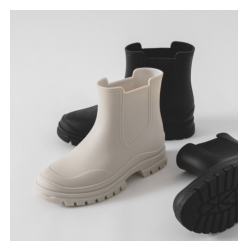

In [94]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

import cv2
import matplotlib.pyplot as plt

# 이미지 가져오기
image_path = './datasets/foot_rain_boot.png'
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

show_image(image)

import numpy as np

# 다중분류
resized_image = cv2.resize(image, (64, 64))
# 이미지 배열에 새로운 차원을 추가
resized_image = np.expand_dims(resized_image, axis=0)

# 클래스 이름 지정
class_names = ['Boot', 'Sandal', 'Shoe']
# 모델 예측 후 예측된 클래스에 해당하는 클래스명을 가져와 출력
predicted_probabilities = model.predict(resized_image, batch_size=BATCH_SIZE)[0]
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = class_names[predicted_class_index]

print(predicted_class_name)